In [1]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text


In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

In [5]:
tile_url = get_tile_url("fixed", 2022, 1)
tile_url

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2022/quarter%3D1/2022-01-01_performance_fixed_tiles.zip'

In [6]:
tiles = gp.read_file(tile_url)


In [8]:
tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3003012022320302,53192,31809,15,125,37,"POLYGON ((28.32275 -25.74548, 28.32825 -25.745..."
1,1231331000100000,21486,15258,13,4,1,"POLYGON ((87.36328 27.05913, 87.36877 27.05913..."
2,0323200012222203,57701,19042,12,228,67,"POLYGON ((-66.79138 10.50402, -66.78589 10.504..."
3,1321001313111333,153438,41591,19,21,7,"POLYGON ((118.11951 39.60992, 118.12500 39.609..."
4,1230222100110001,89316,44292,5,52,21,"POLYGON ((46.67542 24.52713, 46.68091 24.52713..."
...,...,...,...,...,...,...,...
6742519,0302230233130010,50959,7133,23,1,1,"POLYGON ((-83.04565 43.26121, -83.04016 43.261..."
6742520,3130100010322330,702,326,56,2,1,"POLYGON ((147.16187 -41.23651, 147.16736 -41.2..."
6742521,2103111221111221,11248,804,603,3,1,"POLYGON ((-47.14783 -23.91597, -47.14233 -23.9..."
6742522,1330001113122023,37376,88543,42,27,1,"POLYGON ((140.45471 40.60144, 140.46021 40.601..."


In [9]:
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
counties = gp.read_file(county_url)


In [10]:
il_counties = counties.loc[counties['STATEFP'] == '17'].to_crs(4326) 


In [11]:
il_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
85,17,067,00424235,17067,Hancock,Hancock County,06,H1,G4020,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,"POLYGON ((-91.37421 40.46399, -91.37385 40.464..."
92,17,025,00424214,17025,Clay,Clay County,06,H1,G4020,None,None,None,A,1212815740,3271820,+38.7468187,-088.4823254,"POLYGON ((-88.69517 38.82630, -88.69516 38.826..."
131,17,185,00424293,17185,Wabash,Wabash County,06,H1,G4020,None,None,None,A,578403998,10973558,+38.4458209,-087.8391674,"POLYGON ((-87.94460 38.44581, -87.94405 38.446..."
148,17,113,01784833,17113,McLean,McLean County,06,H1,G4020,145,14010,None,A,3064600918,7801224,+40.4945594,-088.8445391,"POLYGON ((-89.26650 40.48555, -89.26653 40.486..."
158,17,005,00424204,17005,Bond,Bond County,06,H1,G4020,476,41180,None,A,985073265,6462629,+38.8859240,-089.4365916,"POLYGON ((-89.36179 39.02772, -89.35987 39.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,17,111,01784815,17111,McHenry,McHenry County,06,H1,G4020,176,16980,16984,A,1562786765,19872668,+42.3242982,-088.4522450,"POLYGON ((-88.23789 42.49490, -88.23427 42.494..."
2922,17,015,00424209,17015,Carroll,Carroll County,06,H1,G4020,None,None,None,A,1153597403,55881824,+42.0709000,-089.9241894,"POLYGON ((-90.16133 42.10972, -90.16135 42.110..."
2987,17,047,00424225,17047,Edwards,Edwards County,06,H1,G4020,None,None,None,A,576012469,781202,+38.4170954,-088.0479408,"POLYGON ((-88.14813 38.44393, -88.14812 38.445..."
2996,17,071,00424237,17071,Henderson,Henderson County,06,H1,G4020,161,15460,None,A,981077355,42557372,+40.8144710,-090.9412464,"POLYGON ((-91.01390 40.89562, -91.01324 40.896..."


In [12]:
tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


In [13]:
tiles_in_il_counties['avg_d_mbps'] = tiles_in_il_counties['avg_d_kbps'] / 1000
tiles_in_il_counties['avg_u_mbps'] = tiles_in_il_counties['avg_u_kbps'] / 1000

In [14]:
tiles_in_il_counties.to_csv('il_speed_tests22q1.csv')

In [15]:
tiles_in_il_counties

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,STATEFP,COUNTYFP,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,avg_d_mbps,avg_u_mbps
393,0231111031131210,191555,49305,41,4,3,"POLYGON ((-91.43921 40.36329, -91.43372 40.363...",85,17,067,...,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,191.555,49.305
159242,0231111120112000,75511,21769,19,6,3,"POLYGON ((-91.14258 40.41350, -91.13708 40.413...",85,17,067,...,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,75.511,21.769
183262,0231111120003031,145169,50562,13,19,3,"POLYGON ((-91.34583 40.40513, -91.34033 40.405...",85,17,067,...,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,145.169,50.562
341386,0231111120112001,155778,20516,16,6,5,"POLYGON ((-91.13708 40.41350, -91.13159 40.413...",85,17,067,...,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,155.778,20.516
372351,0231111120003300,311065,85054,11,18,4,"POLYGON ((-91.34033 40.39676, -91.33484 40.396...",85,17,067,...,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,311.065,85.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324899,0320000120100113,143180,102739,10,1,1,"POLYGON ((-88.37952 40.44277, -88.37402 40.442...",777,17,053,...,None,None,None,A,1257690128,1640595,+40.5965386,-088.2245882,143.180,102.739
6511888,0320000103202322,15943,4866,609,3,1,"POLYGON ((-88.22021 40.51798, -88.21472 40.517...",777,17,053,...,None,None,None,A,1257690128,1640595,+40.5965386,-088.2245882,15.943,4.866
6552465,0320000103233303,39221,11450,44,9,1,"POLYGON ((-88.08289 40.45949, -88.07739 40.459...",777,17,053,...,None,None,None,A,1257690128,1640595,+40.5965386,-088.2245882,39.221,11.450
6588684,0320000121010021,9954,669,41,1,1,"POLYGON ((-88.14880 40.43859, -88.14331 40.438...",777,17,053,...,None,None,None,A,1257690128,1640595,+40.5965386,-088.2245882,9.954,0.669


In [16]:
county_stats = (
    tiles_in_il_counties.groupby(["GEOID", "NAMELSAD"])
    .apply(
        lambda x: pd.Series(
            {"avg_d_mbps_wt": np.average(x["avg_d_mbps"], weights=x["tests"])}
        )
    )
    .reset_index()
    .merge(
        tiles_in_il_counties.groupby(["GEOID", "NAMELSAD"])
        .agg(tests=("tests", "sum"))
        .reset_index(),
        on=["GEOID", "NAMELSAD"],
    )
)

In [17]:
county_stats

,GEOID,NAMELSAD,avg_d_mbps_wt,tests
0,17001,Adams County,163.963493,458
1,17003,Alexander County,16.850359,64
2,17005,Bond County,85.760012,600
3,17007,Boone County,191.471957,3496
4,17009,Brown County,56.329781,128
...,...,...,...,...
97,17195,Whiteside County,186.084539,2552
98,17197,Will County,224.102704,46884
99,17199,Williamson County,133.634864,4353
100,17201,Winnebago County,206.259821,13890


In [18]:
county_data = il_counties[['GEOID', 'geometry']].merge(county_stats, on='GEOID').to_crs(26916)


In [31]:
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 100 Mbps", "100 to 150 Mbps", "150 to 200 Mbps", "200+ Mbps"]

county_data['group'] = pd.cut(
    county_data.avg_d_mbps_wt, 
    (0, 25, 50, 100, 150, 200, 500), 
    right=False, 
    labels = labels
)

In [20]:
il_places = gp.read_file("ftp://ftp2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_17_place.zip")


In [21]:
il_places = il_places.loc[il_places['PCICBSA'] >= "Y"].sample(15, random_state=1).to_crs(26916)
il_places["centroid"] = il_places["geometry"].centroid
il_places.set_geometry("centroid", inplace = True)

In [22]:
il_places

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,centroid
115,17,20162,02394537,1720162,Dixon,Dixon city,25,C1,Y,N,G4110,A,20077395,1072357,+41.8444557,-089.4790438,"POLYGON ((291138.589 4634471.117, 291156.238 4...",POINT (294156.962 4635418.265)
1100,17,72000,02395940,1772000,Springfield,Springfield city,25,C1,Y,N,G4110,A,157842767,16288284,+39.7207553,-089.7056241,"MULTIPOLYGON (((268048.887 4400197.655, 268053...",POINT (272697.865 4405705.670)
148,17,61015,02396250,1761015,Pontiac,Pontiac city,25,C1,Y,N,G4110,A,20970348,650139,+40.8989810,-088.6450605,"POLYGON ((358348.172 4526880.382, 359120.351 4...",POINT (361713.969 4527634.284)
923,17,51180,02395129,1751180,Mount Vernon,Mount Vernon city,25,C1,Y,N,G4110,A,37764920,205417,+38.3142052,-088.9174702,"MULTIPOLYGON (((333237.985 4240234.563, 333239...",POINT (332377.995 4242396.412)
1025,17,24582,02394709,1724582,Evanston,Evanston city,25,C5,Y,N,G4110,A,20148537,57390,+42.0463909,-087.6943525,"POLYGON ((439399.936 4657021.484, 439402.837 4...",POINT (442570.881 4655154.533)
1077,17,12385,02393796,1712385,Champaign,Champaign city,25,C1,Y,N,G4110,A,59138257,374535,+40.1140991,-088.2746190,"POLYGON ((386360.779 4440376.621, 386371.179 4...",POINT (391468.211 4441232.509)
933,17,38115,02395451,1738115,Jacksonville,Jacksonville city,25,C1,Y,N,G4110,A,27356767,510223,+39.7291510,-090.2322010,"POLYGON ((217891.318 4402106.641, 217949.953 4...",POINT (223026.013 4402695.862)
1270,17,28326,02394842,1728326,Galesburg,Galesburg city,25,C1,Y,N,G4110,A,45954312,459914,+40.9502170,-090.3765641,"POLYGON ((210226.078 4535889.938, 210230.465 4...",POINT (215813.014 4538759.257)
854,17,11163,02393739,1711163,Carbondale,Carbondale city,25,C1,Y,N,G4110,A,45033364,1127424,+37.7220617,-089.2236637,"MULTIPOLYGON (((310589.037 4179786.621, 310592...",POINT (304018.204 4177312.758)
1016,17,65000,02396405,1765000,Rockford,Rockford city,25,C1,Y,N,G4110,A,166740314,2628722,+42.2592998,-089.0634783,"MULTIPOLYGON (((339759.120 4682174.956, 339802...",POINT (329746.708 4680679.317)


In [32]:
county_data

,GEOID,geometry,NAMELSAD,avg_d_mbps_wt,tests,group
0,17067,"POLYGON ((129101.051 4488455.812, 129134.100 4...",Hancock County,125.078679,951,100 to 150 Mbps
1,17025,"POLYGON ((352849.827 4298866.081, 352850.580 4...",Clay County,194.084027,668,150 to 200 Mbps
2,17185,"POLYGON ((417570.004 4255702.403, 417618.938 4...",Wabash County,136.675777,745,100 to 150 Mbps
3,17113,"POLYGON ((307901.639 4484118.557, 307901.636 4...",McLean County,187.422208,11656,150 to 200 Mbps
4,17005,"POLYGON ((295555.924 4322507.341, 295722.506 4...",Bond County,85.760012,600,50 to 100 Mbps
...,...,...,...,...,...,...
97,17111,"POLYGON ((398278.387 4705468.596, 398575.416 4...",McHenry County,225.196326,21646,200+ Mbps
98,17015,"POLYGON ((238623.174 4666796.357, 238622.871 4...",Carroll County,101.796234,901,100 to 150 Mbps
99,17047,"POLYGON ((399806.673 4255696.486, 399809.849 4...",Edwards County,193.987521,336,150 to 200 Mbps
100,17071,"POLYGON ((161853.035 4534931.176, 161913.681 4...",Henderson County,109.183229,310,100 to 150 Mbps


In [33]:
county_data.loc[county_data.NAMELSAD == "Cook County"]

,GEOID,geometry,NAMELSAD,avg_d_mbps_wt,tests,group
22,17031,"POLYGON ((397563.165 4657955.187, 397563.255 4...",Cook County,228.700856,265681,200+ Mbps


4

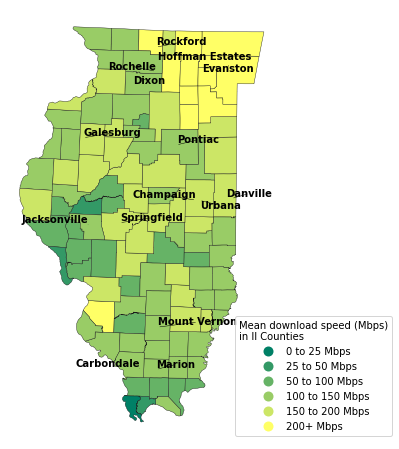

In [35]:
fig, ax = plt.subplots(1, figsize=(20, 8))

county_data.plot(
    column="group", cmap="summer", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True
)

ax.axis("off")

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45, 0.3))
leg.set_title("Mean download speed (Mbps)\nin Il Counties")

texts = []
for x, y, label in zip(il_places.geometry.x, il_places.geometry.y, il_places["NAME"]):
    texts.append(plt.text(x, y, label, fontsize=10, fontweight="bold", ha="left"))

adjust_text(
    texts,
    force_points=0.3,
    force_text=0.8,
    expand_points=(1, 1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
)